In [1]:
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt
import numpy as np
import re
import dpsimpy

model_name = "EMT_Ph1_SSN_RLC";
time_step = 0.0001;
final_time = 0.2;

# Nodes
n1 = dpsimpy.emt.SimNode('n1', dpsimpy.PhaseType.Single)
gnd = dpsimpy.emt.SimNode.gnd

# Components
vs = dpsimpy.emt.ph1.VoltageSource('vs')
vs.set_parameters(V_ref=complex(10,0), f_src=50)
rlc = dpsimpy.emt.ph1.Full_Serial_RLC('rlc')
rlc.set_parameters(R=1, L=0.05, C=0.01)

# Assemble circuit
vs.connect([gnd, n1])
rlc.connect([gnd, n1])

system = dpsimpy.SystemTopology(50, [gnd, n1], [vs, rlc])

#Logging
logger = dpsimpy.Logger(model_name)
dpsimpy.Logger.set_log_dir('logs/' + model_name)
logger.log_attribute('v_rlc', 'v_intf', rlc);
logger.log_attribute('v_n1', 'v', n1);
logger.log_attribute('i_rlc', 'i_intf', rlc);

#Simulation
sim = dpsimpy.Simulation(model_name, dpsimpy.LogLevel.debug)
sim.set_system(system)
sim.set_time_step(time_step)
sim.set_final_time(final_time)
sim.set_domain(dpsimpy.Domain.EMT)
sim.do_init_from_nodes_and_terminals(False)
sim.add_logger(logger)

sim.run()


[21:10:06.880093 EMT_Ph1_SSN_RLC info] Initialize simulation: EMT_Ph1_SSN_RLC
[21:10:06.880266 MnaSolverFactory info] creating EigenDense solver implementation
[21:10:06.881105 EMT_Ph1_SSN_RLC info] Scheduling tasks.
[21:10:06.881427 EMT_Ph1_SSN_RLC info] Scheduling done.
[21:10:06.881431 EMT_Ph1_SSN_RLC info] Opening interfaces.
[21:10:06.881433 EMT_Ph1_SSN_RLC info] Start synchronization with remotes on interfaces
[21:10:06.881434 EMT_Ph1_SSN_RLC info] Synchronized simulation start with remotes
[21:10:06.881437 EMT_Ph1_SSN_RLC info] Start simulation: EMT_Ph1_SSN_RLC
[21:10:06.881441 EMT_Ph1_SSN_RLC info] Time step: 1.000000e-04
[21:10:06.881443 EMT_Ph1_SSN_RLC info] Final time: 2.000000e-01
[21:10:06.952386 EMT_Ph1_SSN_RLC info] Simulation calculation time: 0.070937
[21:10:06.952422 EMT_Ph1_SSN_RLC info] Simulation finished.


logs/EMT_Ph1_SSN_RLC/EMT_Ph1_SSN_RLC.csv
column number: 3
results length: 2001
real column names: ['i_rlc', 'v_n1', 'v_rlc']
complex column names: []


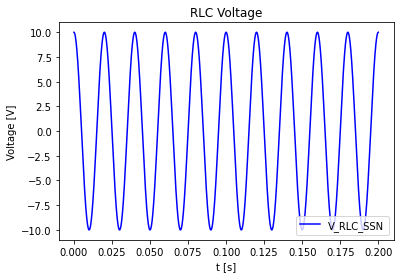

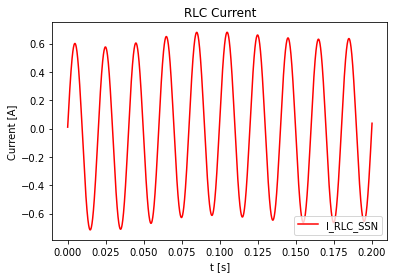

In [4]:
#Read Results

work_dir = 'logs/EMT_Ph1_SSN_RLC/'
log_name = 'EMT_Ph1_SSN_RLC'
print(work_dir + log_name + '.csv')
ts_emt_ph1_ssn_rlc = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')


#Plot Results

fig1 = plt.figure()
plt.plot(ts_emt_ph1_ssn_rlc['v_rlc'].time, ts_emt_ph1_ssn_rlc['v_rlc'].values, "b-", label='V_RLC_SSN')

plt.title('RLC Voltage')
plt.xlabel('t [s]')
plt.ylabel('Voltage [V]')

plt.legend(loc = 4)
#plt.legend(bbox_to_anchor=(1,1))

fig2 = plt.figure()
plt.plot(ts_emt_ph1_ssn_rlc['i_rlc'].time, ts_emt_ph1_ssn_rlc['i_rlc'].values, "r-", label='I_RLC_SSN')

plt.title('RLC Current')
plt.xlabel('t [s]')
plt.ylabel('Current [A]')

plt.legend(loc = 4)
#plt.legend(bbox_to_anchor=(1,1))